In [112]:

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [115]:
df = pd.read_csv('../../../piw-route-choice-shortest-path_routes_usage.csv')
df = df.drop(columns=["route"])
df = df.transpose()
df = df.loc[:, (df.mean(axis=0) > 0.005)]
df = df.reset_index()
df = df.rename(columns={'index':"beta"})
df.head()

,beta,0,1,2,3,4,5,6,7,8,...,145,146,147,148,149,150,151,152,153,154
0,fraction,0.002032,0.011521,0.003046,0.005533,0.013957,0.003821,0.001689,0.013072,0.003718,...,0.002428,0.002877,0.002974,0.00022,0.001226,0.00044,0.001356,0.007797,0.010963,0.020457
1,count,3595.000000,20388.000000,5390.000000,9791.000000,24699.000000,6762.000000,2989.000000,23133.000000,6579.000000,...,4297.000000,5091.000000,5262.000000,389.00000,2169.000000,779.00000,2400.000000,13797.000000,19400.000000,36200.000000


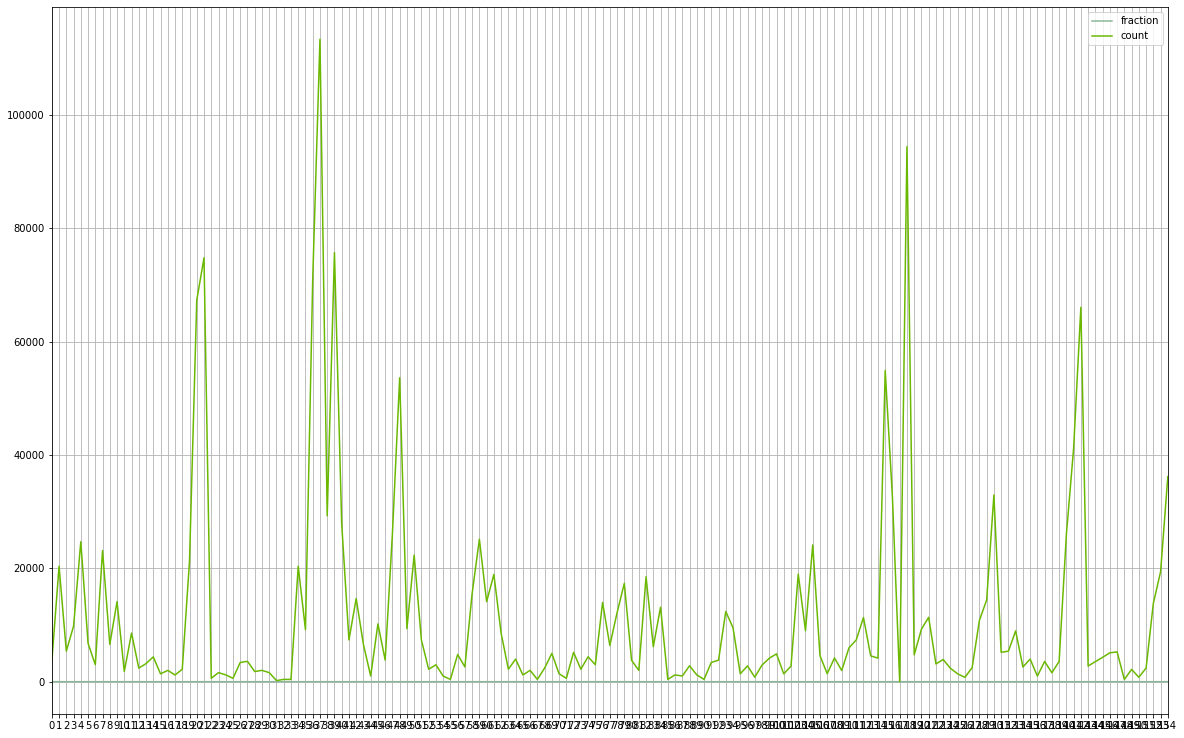

In [116]:
plt.figure(figsize=(20,13))
parallel_coordinates(df, 'beta', axvlines= False)
plt.show()